In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_oscillator_3variables import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:733: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:742: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:765: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\6.Semester\BAC\Code_bac\final_examples\oscillator\../../PI_GP_regressor\main_class.py:774: UserWarning:The balance properties of Sobol' points require n to be a power of 2.


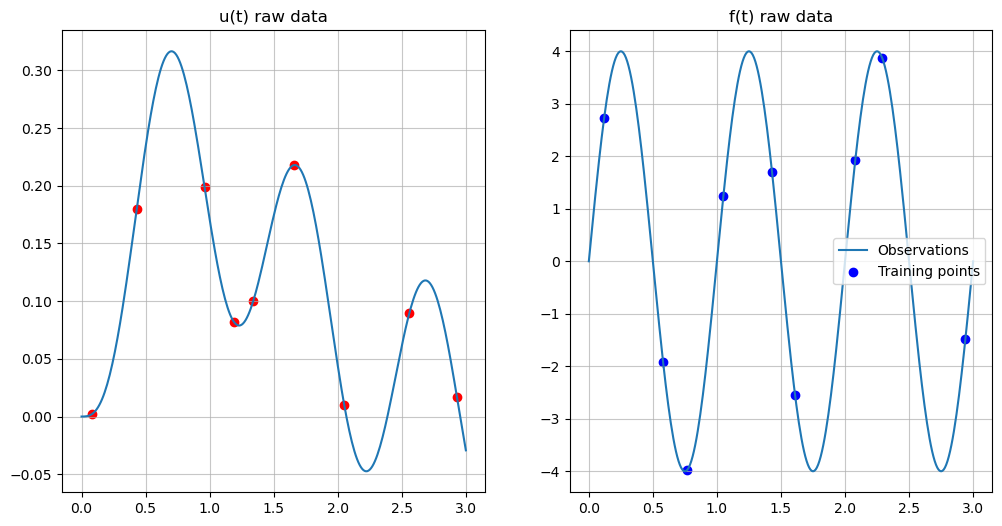

In [2]:
kernel = [gram_Matrix,k_uu,k_uf,k_fu,k_ff]
params = ["l","sigma_f","m","b","k"]
seeds_training = [50,14] #sets the seeds for the random training points--- change when the points are not optimal
model = PhysicsInformedGP_regressor(kernel,timedependence=False, params = params)
model.set_training_data("damped_m1k2b1.csv",9,[1e-7,1e-7],seeds_training)
model.plot_raw_data(Training_points=True)
model.set_validation_data(1000)


In [7]:
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-2.5,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((5))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.3, 1))
    theta_initial[1] = rng.uniform(0, 2, 1)
    theta_initial[2] = rng.uniform(0, 3, 1)
    theta_initial[3] = rng.uniform(0, 3, 1)
    theta_initial[4] = rng.uniform(1, 4, 1)
    return theta_initial
n_iterations, n_threads = 2000, 10

model.train("TNC",n_iterations,n_threads,{'theta_initial': get_initial_values,   #needed for all optimization methods
                                            'bounds': ((1e-2, None), (1e-5, None), (1e-2, None),(1e-2, None),(1e-2,None)), #needed for TNC and L-BFGS-B
                                            'gtol': 1e-6})
      

100%|██████████| 2000/2000 [07:24<00:00,  4.50it/s]


     fun: -2.1071701049804688
     jac: array([-41.632812 ,  -1.8203125,   4.048828 ,   4.7841797,  -3.2141113],
      dtype=float32)
 message: 'Converged (|x_n-x_(n-1)| ~= 0)'
    nfev: 84
     nit: 17
  status: 2
 success: True
       x: array([0.36578537, 0.19388666, 0.99588657, 1.99310755, 1.99578892])


In [3]:
x1 =  np.array([0.42512575, 0.22936461, 0.99998575, 2.00228095, 2.0203097 ]) 
model.set_params(x1)
model.result = {"fun": -2.882169723510742}

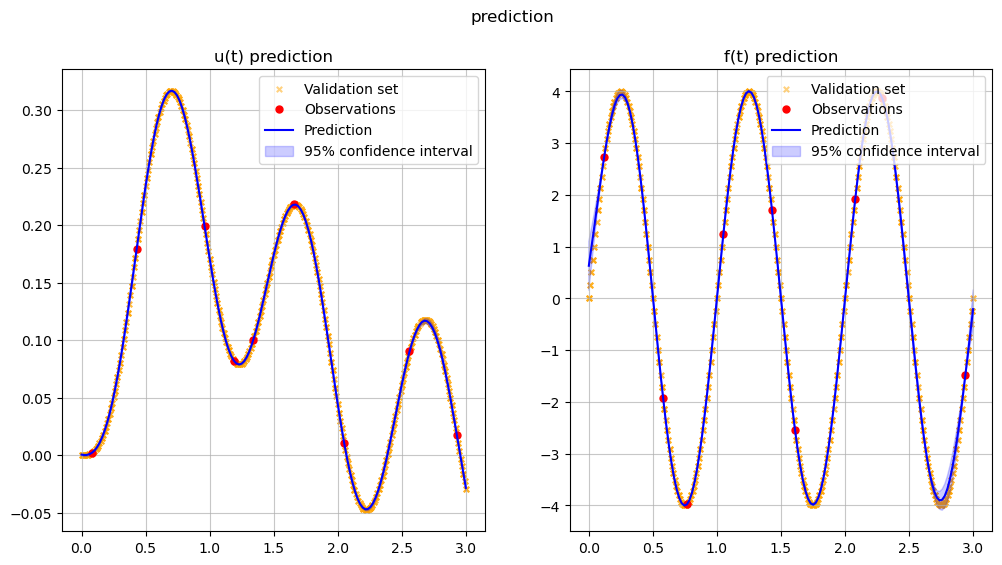

In [5]:
X_star = np.linspace(0,3,150).reshape(-1,1)
model.predict_model(X_star)
model.plot_prediction(X_star, "prediction", "prediction.png")
model.error()
#print(model)

---------GPY--------
MSE u:  0.0005482817433421849
MSE f:  8.130915521377691


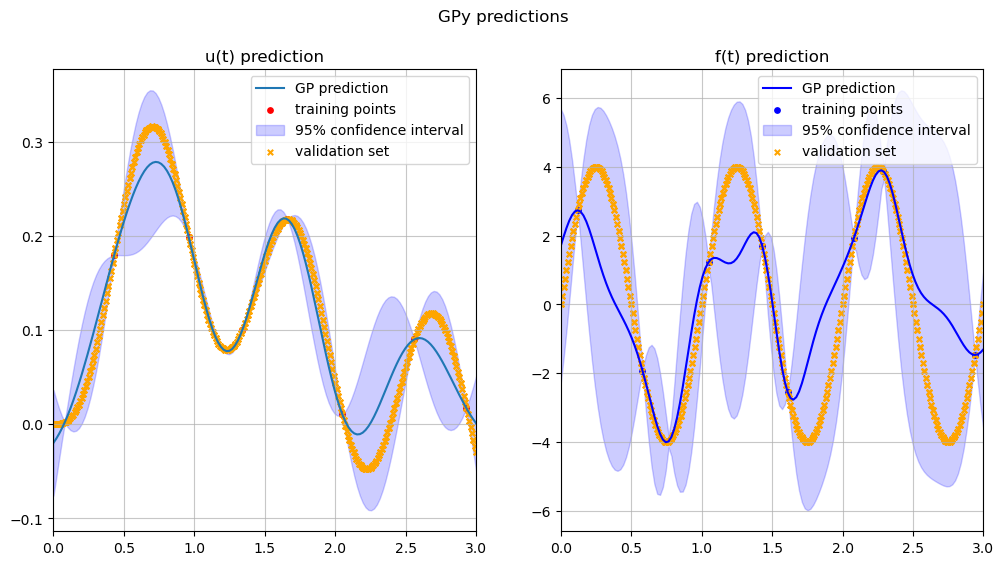

In [6]:
model.use_GPy(X_star, "GPy_prediction.png")


In [ ]:
import matplotlib.pyplot as plt
def plot_kernel_mat(K,name:str):
    # plot
    plt.figure()
    cont = plt.imshow(K, cmap='Reds')
    plt.colorbar(cont)
    plt.title(f'$K_{name}$', fontsize=20, weight='bold')
    plt.tight_layout()
    plt.show()
plot_kernel_mat(model.k_ff(X_star,X_star,model.get_params()),"{ff}")
plot_kernel_mat(model.k_uu(X_star,X_star,model.get_params()),"{uu}}")
plot_kernel_mat(model.k_uf(X_star,X_star,model.get_params()),"{uf}")
plot_kernel_mat(model.k_fu(X_star,X_star,model.get_params()),"{fu}")